In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cali_df=pd.read_csv('calibration_records.csv')
machine_df=pd.read_csv('machine_info.csv')
messy_df=pd.read_csv('messy_manufacturing_data.csv')
operator_df=pd.read_csv('machine_info.csv')
supplies_df=pd.read_csv('supplier_performance.csv')

In [3]:
supplies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SupplierID          5 non-null      object 
 1   OnTimeDeliveryRate  5 non-null      float64
 2   QualityScore        5 non-null      float64
dtypes: float64(2), object(1)
memory usage: 252.0+ bytes


In [4]:
messy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   BatchID                  100000 non-null  int64  
 1   ProductType              100000 non-null  object 
 2   ProductionDate           100000 non-null  object 
 3   Length_mm                95000 non-null   float64
 4   Diameter_mm              97000 non-null   float64
 5   DefectCount              98000 non-null   float64
 6   OperatorID               100000 non-null  object 
 7   Shift                    100000 non-null  object 
 8   Temperature              99000 non-null   float64
 9   Humidity                 100000 non-null  float64
 10  MaterialType             100000 non-null  object 
 11  MachineID                100000 non-null  object 
 12  CalibrationDate          100000 non-null  object 
 13  SupplierID               100000 non-null  object 
 14  Shift

here we can see date and calibration date are in object type but these are date so  now b= need to format

In [5]:
 

date_cols = ['ProductionDate', 'CalibrationDate']

for col in date_cols:
    messy_df[col] = pd.to_datetime(messy_df[col], errors='coerce', format='mixed')

 

suppose i have a collumn now find misg value, how can i do?

In [6]:
missing_col=messy_df.columns[messy_df.isnull().any()].tolist()

now i replace all mising collumn by median value

In [7]:
for col  in missing_col:
    median_value=messy_df[col].median()
    messy_df[col]=messy_df[col].fillna(median_value)

Statistical Analysis

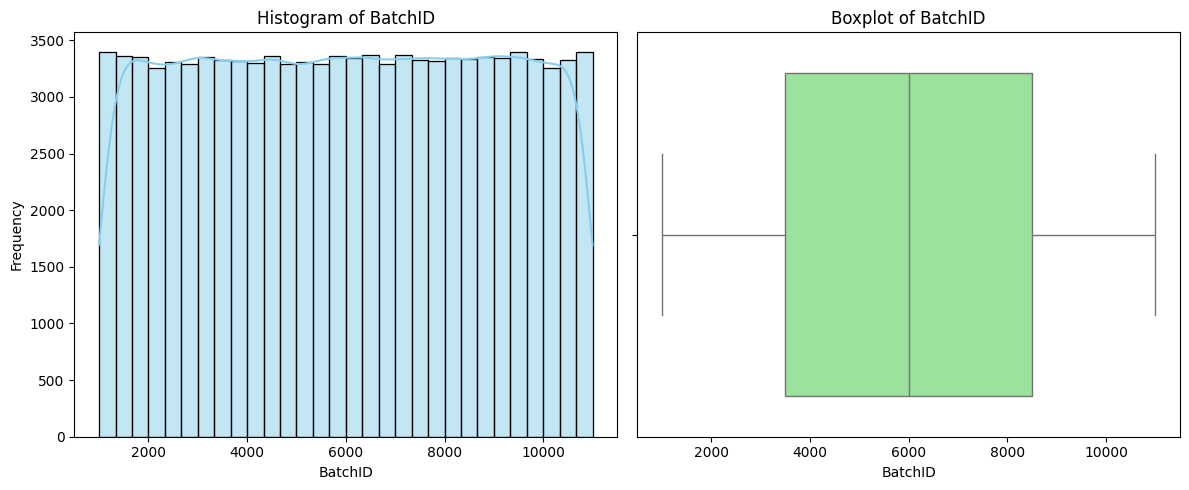

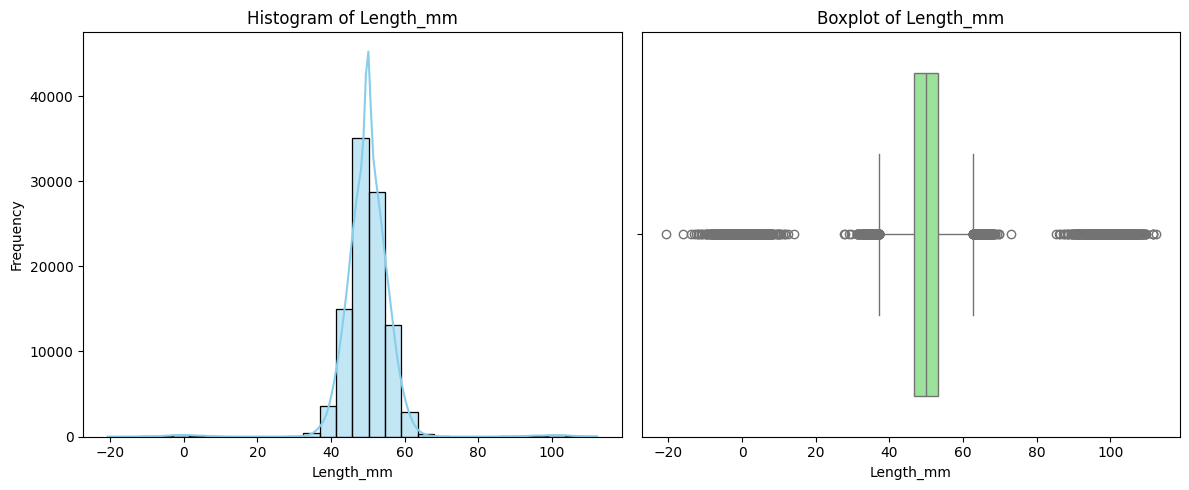

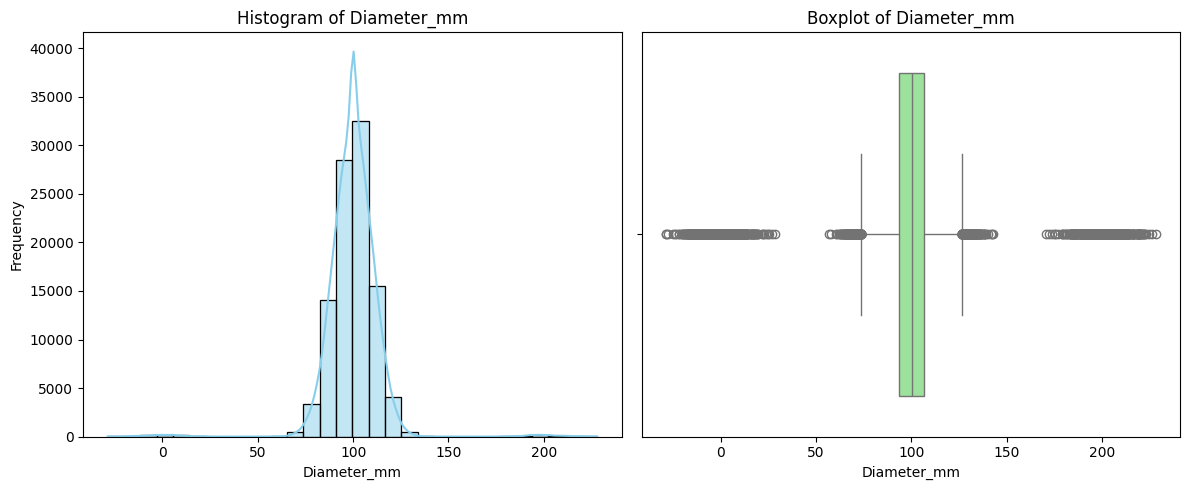

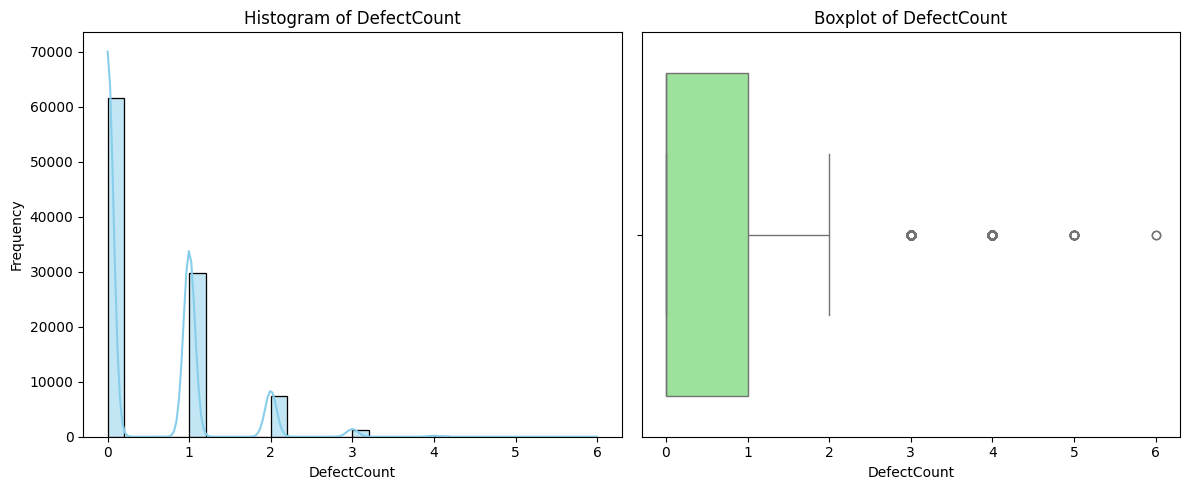

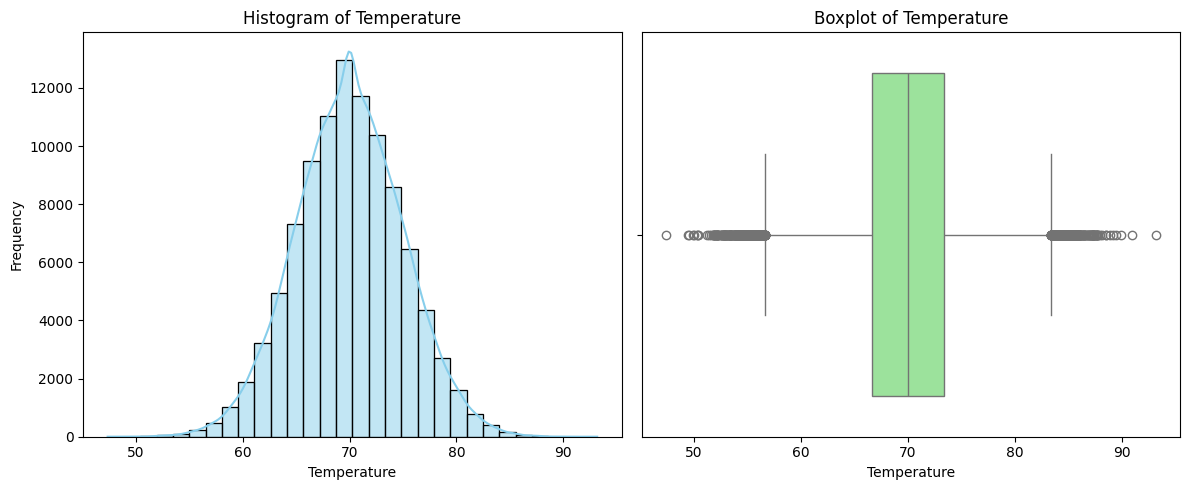

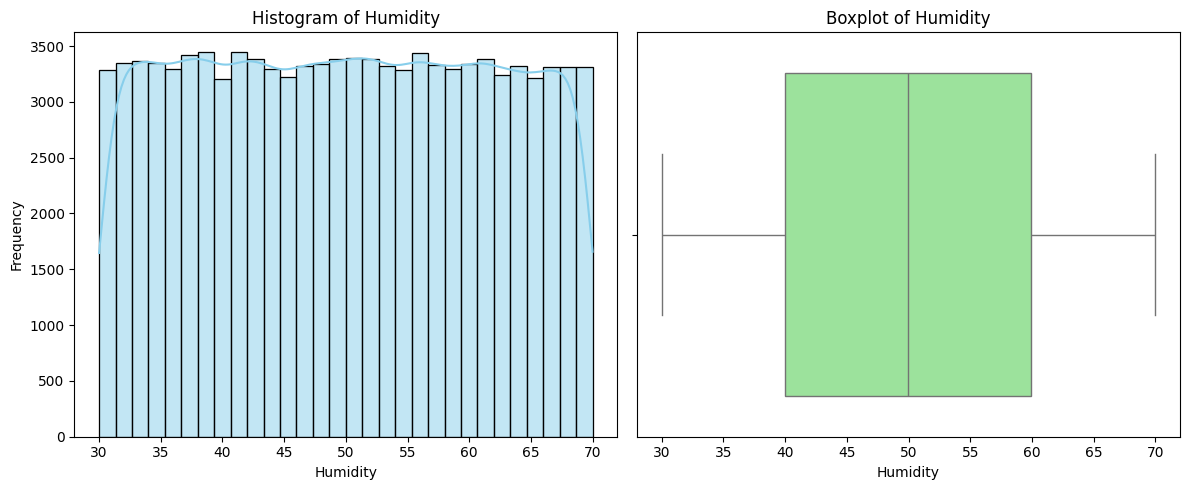

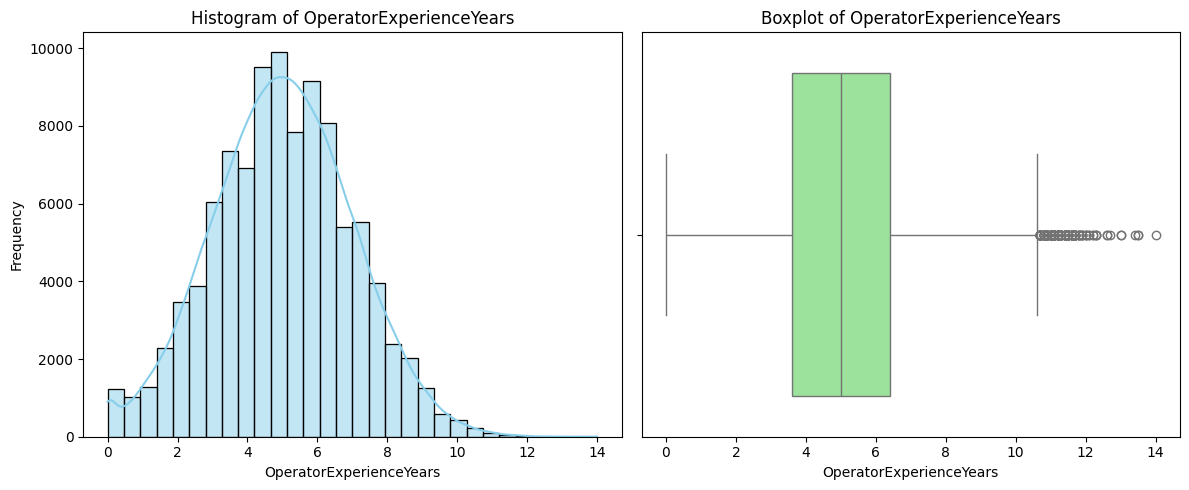

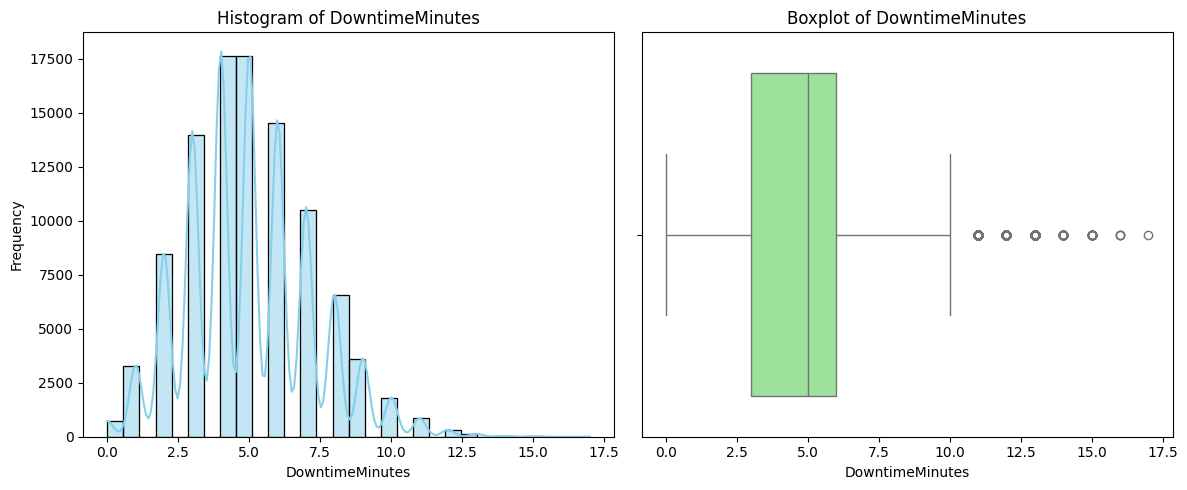

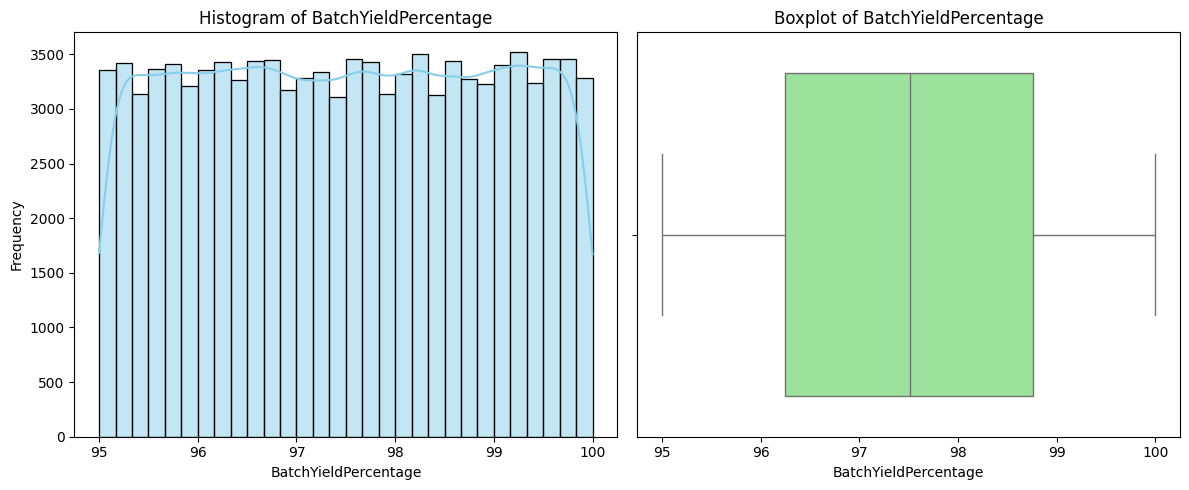

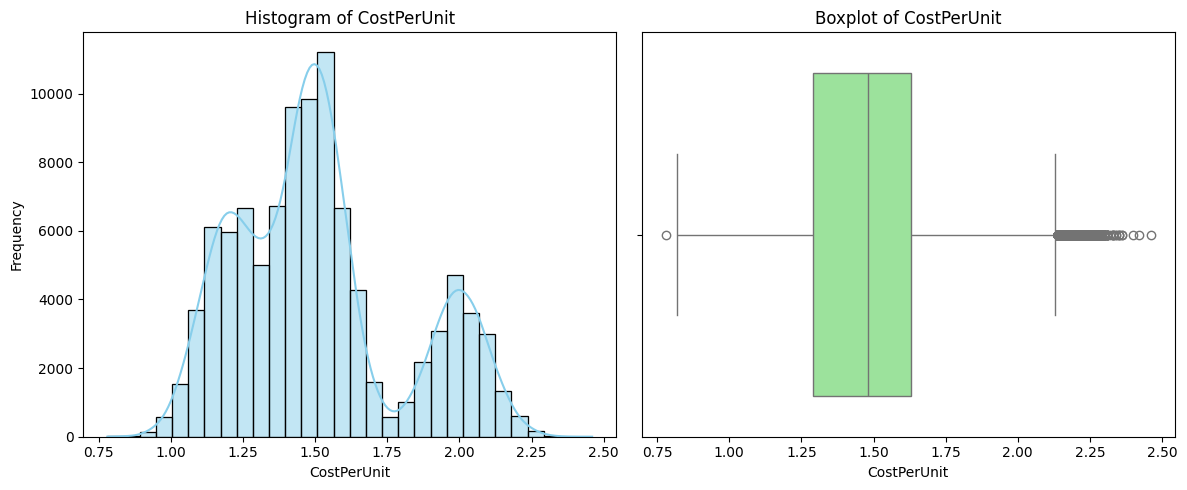

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#identify numreic columns
numreic_cols= messy_df.select_dtypes(include=[np.number]).columns.tolist()
#loop for each numreic collumns and plot
for col in numreic_cols:
    data= messy_df[col].dropna()
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data, bins=30, kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data, color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()


 

find outlier and replace median or average value
if distribution was normal then replace avrg  value and others median

In [9]:
 # call library
from scipy import stats

def treat_outliers(df, col):
    data = df[col].dropna()
    
    # Step 1: Find IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Step 2: Check Normality (Shapiro test - use sample if too large)
    sample = data.sample(5000, random_state=42) if len(data) > 5000 else data
    stat, p = stats.shapiro(sample)
    
    if p > 0.05:
        replace_value = data.mean()   # Normal distribution → mean
    else:
        replace_value = data.median() # Skewed → median
    
    # Step 3: Replace Outliers
    df[col] = np.where((df[col] < lower) | (df[col] > upper),
                       replace_value,
                       df[col])
    
    return df

# Apply to all numeric columns
numeric_cols = messy_df.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    messy_df = treat_outliers(messy_df, col)

In [10]:
messy_df.head()

,BatchID,ProductType,ProductionDate,Length_mm,Diameter_mm,DefectCount,OperatorID,Shift,Temperature,Humidity,...,MachineID,CalibrationDate,SupplierID,ShiftSupervisor,OperatorExperienceYears,DowntimeMinutes,BatchYieldPercentage,ReworkNeeded,CostPerUnit,PassFail
0,8270.0,Widget,2021-07-10,44.938627,112.269564,1.0,OP006,Morning,72.311150,50.812541,...,M08,2021-06-16,S003,Alice,4.3,4.0,99.26,False,1.31,Pass
1,1860.0,Widget,2021-08-08,57.652430,102.691653,0.0,OP002,Morning,66.115419,64.234323,...,M10,2021-08-03,S004,Alice,10.2,6.0,95.62,False,1.19,Fail
2,6390.0,Gadget,2021-06-05,46.794612,115.233585,0.0,OP008,Morning,73.543086,47.635384,...,M01,2021-05-31,S001,Alice,9.0,3.0,96.09,False,1.66,Fail
3,6191.0,Widget,2021-01-23,52.208051,89.762296,0.0,OP011,Evening,71.844915,54.193531,...,M04,2021-01-14,S004,Bob,4.7,6.0,96.13,False,1.34,Fail
4,6734.0,Doohickey,2021-07-01,51.413910,109.002360,0.0,OP019,Morning,70.572156,50.590860,...,M04,2021-06-24,S005,Alice,5.0,2.0,95.12,False,1.48,Fail


In [11]:
messy_df['Length_mm'].head(10)

0    44.938627
1    57.652430
2    46.794612
3    52.208051
4    51.413910
5    46.570419
6    48.060733
7    46.093871
8    47.016669
9    51.227834
Name: Length_mm, dtype: float64

1. Are Gadget parts hitting our length spec (50 mm) on average? One‐sample z‐test to see if mean Length_mm differs from target.

In [12]:
 
from statsmodels.stats.weightstats import ztest

# Run one-sample z-test (mu=50)
z_stat, p_value = ztest(messy_df['Length_mm'], value=50)

print("Z-statistic:", z_stat)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject H0 → Mean is significantly different from 50 mm")
else:
    print("Fail to reject H0 → Mean is not significantly different from 50 mm")


Z-statistic: -0.9811100330674823
p-value: 0.3265384832978324
Fail to reject H0 → Mean is not significantly different from 50 mm


2. Do defect rates differ
significantly between
Morning vs. Night
shifts?

In [13]:
messy_df['Shift'].value_counts()

Shift
Morning    49975
Evening    29954
Night      20071
Name: count, dtype: int64

In [14]:
messy_df['PassFail'].value_counts()

PassFail
Pass    59982
Fail    40018
Name: count, dtype: int64

In [15]:
messy_df[['Shift','PassFail']].head(10)

,Shift,PassFail
0,Morning,Pass
1,Morning,Fail
2,Morning,Fail
3,Evening,Fail
4,Morning,Fail
5,Night,Fail
6,Evening,Pass
7,Morning,Fail
8,Morning,Pass
9,Morning,Pass


In [16]:
 
from scipy.stats import chi2_contingency

filtered_df = messy_df[messy_df["Shift"].isin(["Morning", "Night"])]
# Step 1: Contingency table (counts)
contingency_table = pd.crosstab( filtered_df["Shift"], filtered_df["PassFail"])
print("Contingency Table:\n", contingency_table)

# Step 2: Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Step 3: Decision
alpha = 0.05
if p < alpha:
    print("  Reject H0 → Defect rate differs significantly between shifts")
else:
    print("  Fail to reject H0 → No significant difference between shifts")


Contingency Table:
 PassFail   Fail   Pass
Shift                 
Morning   19918  30057
Night      8143  11928

Chi-square Statistic: 3.0194154932495274
p-value: 0.0822731141831912
Degrees of Freedom: 1
Expected Frequencies:
 [[20020.39338435 29954.60661565]
 [ 8040.60661565 12030.39338435]]
  Fail to reject H0 → No significant difference between shifts


3. Which material type
yields the highest
average BatchYield%?

In [17]:
messy_df['MaterialType'].value_counts()

MaterialType
Steel       50156
Aluminum    29948
Brass       19896
Name: count, dtype: int64

In [18]:
messy_df['BatchYieldPercentage'].describe()

count    100000.000000
mean         97.502722
std           1.446561
min          95.000000
25%          96.250000
50%          97.510000
75%          98.760000
max         100.000000
Name: BatchYieldPercentage, dtype: float64

In [19]:
messy_df[['MaterialType','BatchYieldPercentage']].head(10)

,MaterialType,BatchYieldPercentage
0,Aluminum,99.26
1,Aluminum,95.62
2,Steel,96.09
3,Steel,96.13
4,Steel,95.12
5,Aluminum,96.21
6,Steel,97.45
7,Steel,95.62
8,Aluminum,97.58
9,Steel,98.96


In [20]:
 
from scipy.stats import f_oneway
 

 

# ✅ Step 1: every material type  different  group  create
groups = messy_df.groupby("MaterialType")["BatchYieldPercentage"].apply(list)

# ✅ Step 2:  if 2 or more group then apply anova
if len(groups) > 1:
    f_stat, p_val = f_oneway(*groups)
    print("F-statistic:", f_stat)
    print("p-value:", p_val)

    # ✅ Decision
    alpha = 0.05
    if p_val < alpha:
        print("Reject H0 →  at least one material type   yield %  dif")
    else:
        print("Fail to reject H0 →  three material type   yield %  equal")

# ✅ Step 3:  each material type  average
avg_yield = messy_df.groupby("MaterialType")["BatchYieldPercentage"].mean()
print("\nAverage Yield by Material Type:\n", avg_yield)

# ✅ Step 4:  which is highest
best_material = avg_yield.idxmax()
print("\n✔ Highest Average Yield:", best_material)


F-statistic: 1.5559267498899871
p-value: 0.21099886162615583
Fail to reject H0 →  three material type   yield %  equal

Average Yield by Material Type:
 MaterialType
Aluminum    97.505097
Brass       97.516728
Steel       97.495747
Name: BatchYieldPercentage, dtype: float64

✔ Highest Average Yield: Brass


4. Do more experienced
operators produce
fewer defects?

In [21]:
data=pd.read_csv('operator_info.csv')

In [22]:
 
data.head()


,OperatorID,OperatorName,HireDate,Department
0,OP001,Operator_1,2016-01-27,Production
1,OP002,Operator_2,2016-11-18,Maintenance
2,OP003,Operator_3,2020-12-22,Maintenance
3,OP004,Operator_4,2016-07-28,Quality Assurance
4,OP005,Operator_5,2019-04-18,Quality Assurance


In [23]:
temp_table=messy_df[['OperatorID','PassFail']]

In [24]:
temp_table= pd.merge(temp_table,data,how="left")

In [25]:
print(temp_table.head())

  OperatorID PassFail OperatorName    HireDate   Department
0      OP006     Pass   Operator_6  2016-08-30  Maintenance
1      OP002     Fail   Operator_2  2016-11-18  Maintenance
2      OP008     Fail   Operator_8  2018-11-03   Production
3      OP011     Fail  Operator_11  2020-08-16   Production
4      OP019     Fail  Operator_19  2018-09-26   Production


In [26]:
temp_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   OperatorID    100000 non-null  object
 1   PassFail      100000 non-null  object
 2   OperatorName  100000 non-null  object
 3   HireDate      100000 non-null  object
 4   Department    100000 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [27]:
temp_table['HireDate'] = pd.to_datetime(temp_table['HireDate'],format='%Y-%m-%d')   


In [28]:
 
current_date = pd.Timestamp.today()
temp_table['ExperienceYears'] = (current_date - temp_table['HireDate']).dt.days / 365



In [29]:
from scipy.stats import ttest_ind
 
pass_group = temp_table[ temp_table["PassFail"]=="Pass"]["ExperienceYears"]
fail_group =  temp_table[temp_table["PassFail"]=="Fail"]["ExperienceYears"]


t_stat, p_value = ttest_ind(pass_group, fail_group, equal_var=False)  # Welch’s t-test
print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject H0 → Experience differs significantly between Pass and Fail groups")
else:
    print("Fail to reject H0 → No significant difference between groups")


t-statistic: -0.5228823806124953
p-value: 0.6010574558135344
Fail to reject H0 → No significant difference between groups


5. Are suppliers with
lower QualityScore
linked to higher defect
counts?

In [30]:
supplier_performance=pd.read_csv('supplier_performance.csv')

In [31]:
print(supplier_performance.head())

  SupplierID  OnTimeDeliveryRate  QualityScore
0       S001               86.69          4.91
1       S002               99.18          4.15
2       S003               90.15          3.67
3       S004               90.80          3.40
4       S005               97.46          3.10


In [32]:
messy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   BatchID                  100000 non-null  float64       
 1   ProductType              100000 non-null  object        
 2   ProductionDate           100000 non-null  datetime64[ns]
 3   Length_mm                100000 non-null  float64       
 4   Diameter_mm              100000 non-null  float64       
 5   DefectCount              100000 non-null  float64       
 6   OperatorID               100000 non-null  object        
 7   Shift                    100000 non-null  object        
 8   Temperature              100000 non-null  float64       
 9   Humidity                 100000 non-null  float64       
 10  MaterialType             100000 non-null  object        
 11  MachineID                100000 non-null  object        
 12  CalibrationDate  

In [33]:
 
temp_table2 = messy_df[['SupplierID', 'DefectCount']].copy()

 


In [34]:
 
temp_table2 = pd.merge(temp_table2, supplier_performance , how="left",on="SupplierID")

In [35]:
temp_table2

,SupplierID,DefectCount,OnTimeDeliveryRate,QualityScore
0,S003,1.0,90.15,3.67
1,S004,0.0,90.80,3.40
2,S001,0.0,86.69,4.91
3,S004,0.0,90.80,3.40
4,S005,0.0,97.46,3.10
...,...,...,...,...
99995,S005,0.0,97.46,3.10
99996,S004,0.0,90.80,3.40
99997,S003,2.0,90.15,3.67
99998,S004,0.0,90.80,3.40


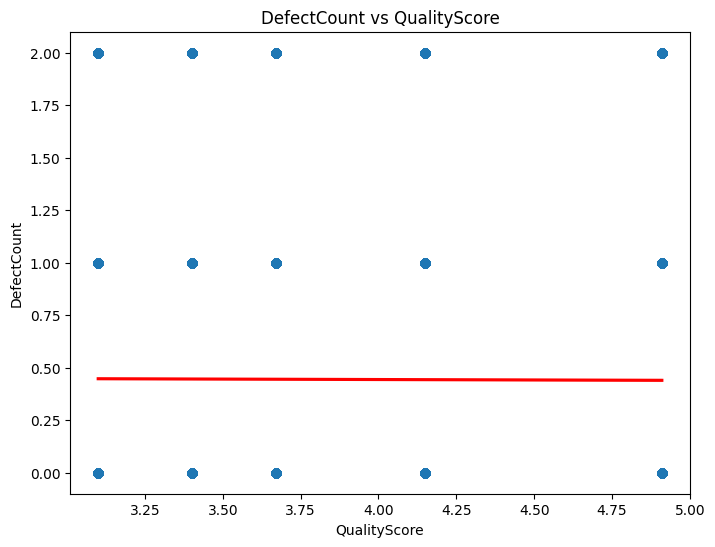

In [36]:
 
import seaborn as sns

# Scatter plot with regression line
plt.figure(figsize=(8,6))
sns.regplot(x='QualityScore', y='DefectCount', data=temp_table2, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('DefectCount vs QualityScore')
plt.xlabel('QualityScore')
plt.ylabel('DefectCount')
plt.show()


In [37]:
  
# correlation
corr = temp_table2['QualityScore'].corr(temp_table2['DefectCount'])
print("Correlation between QualityScore and DefectCount:", corr)


Correlation between QualityScore and DefectCount: -0.004197953875656345


In [38]:
from scipy.stats import pearsonr,spearmanr

 # Pearson correlation
pearson_corr = temp_table2['QualityScore'].corr(temp_table2['DefectCount'], method='pearson')
print("Pearson correlation between QualityScore and DefectCount:", pearson_corr)



Pearson correlation between QualityScore and DefectCount: -0.004197953875656345


6. Do older machines
produce larger diameter
outliers?

In [42]:
machine_df 
 

,MachineID,Model,InstallationDate
0,M01,ModelC,2020-02-05
1,M02,ModelC,2019-12-04
2,M03,ModelC,2019-08-20
3,M04,ModelA,2021-05-02
4,M05,ModelA,2018-11-13
5,M06,ModelA,2018-07-23
6,M07,ModelA,2019-02-19
7,M08,ModelA,2019-10-08
8,M09,ModelC,2018-08-04
9,M10,ModelA,2020-05-01


In [43]:
messy_df.head()

,BatchID,ProductType,ProductionDate,Length_mm,Diameter_mm,DefectCount,OperatorID,Shift,Temperature,Humidity,...,MachineID,CalibrationDate,SupplierID,ShiftSupervisor,OperatorExperienceYears,DowntimeMinutes,BatchYieldPercentage,ReworkNeeded,CostPerUnit,PassFail
0,8270.0,Widget,2021-07-10,44.938627,112.269564,1.0,OP006,Morning,72.311150,50.812541,...,M08,2021-06-16,S003,Alice,4.3,4.0,99.26,False,1.31,Pass
1,1860.0,Widget,2021-08-08,57.652430,102.691653,0.0,OP002,Morning,66.115419,64.234323,...,M10,2021-08-03,S004,Alice,10.2,6.0,95.62,False,1.19,Fail
2,6390.0,Gadget,2021-06-05,46.794612,115.233585,0.0,OP008,Morning,73.543086,47.635384,...,M01,2021-05-31,S001,Alice,9.0,3.0,96.09,False,1.66,Fail
3,6191.0,Widget,2021-01-23,52.208051,89.762296,0.0,OP011,Evening,71.844915,54.193531,...,M04,2021-01-14,S004,Bob,4.7,6.0,96.13,False,1.34,Fail
4,6734.0,Doohickey,2021-07-01,51.413910,109.002360,0.0,OP019,Morning,70.572156,50.590860,...,M04,2021-06-24,S005,Alice,5.0,2.0,95.12,False,1.48,Fail


In [50]:
merged_df = pd.merge( messy_df, machine_df, on="MachineID", how="left")


In [51]:
#Calculate Machine Age
merged_df["ProductionDate"] = pd.to_datetime(merged_df["ProductionDate"])
merged_df["InstallationDate"] = pd.to_datetime(merged_df["InstallationDate"])

merged_df["MachineAgeYears"] = (merged_df["ProductionDate"] - merged_df["InstallationDate"]).dt.days / 365


In [52]:


# 4. Create groups (New vs Mid vs Old machines)
merged_df["AgeGroup"] = pd.cut(merged_df["MachineAgeYears"],
                               bins=[0,5,10,20],
                               labels=["New (0-5y)","Mid (5-10y)","Old (10-20y)"])

# 5. Prepare groups for ANOVA
groups = [g["Diameter_mm"].dropna().values 
          for _, g in merged_df.groupby("AgeGroup")]

# 6. Run ANOVA
f_stat, p_val = stats.f_oneway(*groups)

print("ANOVA F-statistic:", f_stat)
print("p-value:", p_val)

# 7. Decision
alpha = 0.05
if p_val < alpha:
    print("Reject H0 → Machine age groups have significantly different Diameter means")
else:
    print(" Fail to reject H0 → No significant difference in Diameter means between machine age groups")


ANOVA F-statistic: nan
p-value: nan
 Fail to reject H0 → No significant difference in Diameter means between machine age groups


/var/folders/xk/h_d6ynjn4_dct7skwzcdhl4c0000gn/T/ipykernel_20987/536864584.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for _, g in merged_df.groupby("AgeGroup")]
/var/folders/xk/h_d6ynjn4_dct7skwzcdhl4c0000gn/T/ipykernel_20987/536864584.py:11: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_val = stats.f_oneway(*groups)


7. How does time since
last calibration affect
measurement drift?

In [65]:
cali_df.info()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   MachineID        300 non-null    object        
 1   CalibrationDate  300 non-null    datetime64[ns]
 2   TechnicianID     300 non-null    object        
 3   CalibrationType  300 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 9.5+ KB


In [57]:
print("Main data columns:", messy_df.columns.tolist())
print("Calibration data columns:", cali_df.columns.tolist())


Main data columns: ['BatchID', 'ProductType', 'ProductionDate', 'Length_mm', 'Diameter_mm', 'DefectCount', 'OperatorID', 'Shift', 'Temperature', 'Humidity', 'MaterialType', 'MachineID', 'CalibrationDate', 'SupplierID', 'ShiftSupervisor', 'OperatorExperienceYears', 'DowntimeMinutes', 'BatchYieldPercentage', 'ReworkNeeded', 'CostPerUnit', 'PassFail']
Calibration data columns: ['MachineID', 'CalibrationDate', 'TechnicianID', 'CalibrationType']


In [66]:
messy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   BatchID                  100000 non-null  float64       
 1   ProductType              100000 non-null  object        
 2   ProductionDate           100000 non-null  datetime64[ns]
 3   Length_mm                100000 non-null  float64       
 4   Diameter_mm              100000 non-null  float64       
 5   DefectCount              100000 non-null  float64       
 6   OperatorID               100000 non-null  object        
 7   Shift                    100000 non-null  object        
 8   Temperature              100000 non-null  float64       
 9   Humidity                 100000 non-null  float64       
 10  MaterialType             100000 non-null  object        
 11  MachineID                100000 non-null  object        
 12  CalibrationDate  

In [83]:
merged_df1 = pd.merge( messy_df,  cali_df, on="CalibrationDate", how="left")

In [85]:
merged_df1.head(10)

,BatchID,ProductType,ProductionDate,Length_mm,Diameter_mm,DefectCount,OperatorID,Shift,Temperature,Humidity,...,ShiftSupervisor,OperatorExperienceYears,DowntimeMinutes,BatchYieldPercentage,ReworkNeeded,CostPerUnit,PassFail,MachineID_y,TechnicianID,CalibrationType
0,5882.0,Gadget,2021-01-01,40.797250,93.374284,0.0,OP005,Morning,66.924032,68.889928,...,Alice,6.0,7.0,96.53,False,1.43,Fail,NaN,NaN,NaN
1,10116.0,Widget,2021-01-01,50.214055,93.024825,0.0,OP020,Morning,71.587158,42.682909,...,Alice,4.4,2.0,95.43,False,1.10,Fail,NaN,NaN,NaN
2,5570.0,Doohickey,2021-01-01,52.731904,97.808728,0.0,OP006,Morning,68.334657,32.991600,...,Alice,1.0,3.0,97.12,False,1.33,Pass,NaN,NaN,NaN
3,6703.0,Gadget,2021-01-01,52.483238,117.128957,0.0,OP009,Evening,68.508028,45.581561,...,Bob,8.6,6.0,99.55,False,1.58,Pass,NaN,NaN,NaN
4,8304.0,Doohickey,2021-01-01,41.540860,88.953347,1.0,OP005,Morning,76.082013,39.014885,...,Alice,1.8,6.0,99.90,False,1.89,Pass,NaN,NaN,NaN
5,2250.0,Doohickey,2021-01-01,53.764497,115.582046,1.0,OP002,Night,72.052746,69.386404,...,Charlie,6.7,6.0,98.50,False,1.58,Pass,NaN,NaN,NaN
6,1824.0,Widget,2021-01-01,39.109682,100.984794,0.0,OP013,Morning,70.088157,62.680262,...,Alice,4.9,2.0,99.50,False,1.50,Pass,NaN,NaN,NaN
7,1802.0,Gadget,2021-01-01,46.153600,106.908637,0.0,OP020,Morning,72.625714,37.572887,...,Alice,8.1,6.0,97.38,False,1.35,Pass,NaN,NaN,NaN
8,10387.0,Gadget,2021-01-01,42.753751,96.682323,0.0,OP001,Morning,68.699546,42.338619,...,Alice,3.2,10.0,99.17,False,1.45,Pass,NaN,NaN,NaN
9,8373.0,Gadget,2021-01-01,49.975082,90.062158,0.0,OP011,Evening,76.126312,33.306581,...,Bob,5.4,5.0,96.72,False,1.39,Fail,NaN,NaN,NaN


In [87]:
import pandas as pd

# Convert to datetime
messy_df['ProductionDate'] = pd.to_datetime(messy_df['ProductionDate'])
cali_df['CalibrationDate'] = pd.to_datetime(cali_df['CalibrationDate'])

# Sort by MachineID and dates ascending
messy_df = messy_df.sort_values(['MachineID', 'ProductionDate'])
cali_df = cali_df.sort_values(['MachineID', 'CalibrationDate'])


In [90]:
merged_df1['DaysSinceCalibration'] = (merged_df1['ProductionDate'] - merged_df1['CalibrationDate']).dt.days


In [91]:
merged_df1['TechnicianID'].fillna('NoCalibration', inplace=True)
merged_df1['CalibrationType'].fillna('None', inplace=True)
merged_df1['DaysSinceCalibration'].fillna(-1, inplace=True)  # -1 means no calibration


/var/folders/xk/h_d6ynjn4_dct7skwzcdhl4c0000gn/T/ipykernel_20987/332513758.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df1['TechnicianID'].fillna('NoCalibration', inplace=True)
/var/folders/xk/h_d6ynjn4_dct7skwzcdhl4c0000gn/T/ipykernel_20987/332513758.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [93]:
print(merged_df1[['BatchID','ProductionDate','CalibrationDate','DaysSinceCalibration','TechnicianID','CalibrationType']].head())


   BatchID ProductionDate CalibrationDate  DaysSinceCalibration  \
0   5882.0     2021-01-01      2020-12-21                    11   
1  10116.0     2021-01-01      2020-12-04                    28   
2   5570.0     2021-01-01      2020-12-26                     6   
3   6703.0     2021-01-01      2020-12-09                    23   
4   8304.0     2021-01-01      2020-12-12                    20   

    TechnicianID CalibrationType  
0  NoCalibration            None  
1  NoCalibration            None  
2  NoCalibration            None  
3  NoCalibration            None  
4  NoCalibration            None  


8. Does operator
department (Prod vs.
QA vs. Maint) impact
BatchYield%?

In [94]:
print("Main data columns:", messy_df.columns.tolist())
print(" opeator data columns:", operator_df.columns.tolist())

Main data columns: ['BatchID', 'ProductType', 'ProductionDate', 'Length_mm', 'Diameter_mm', 'DefectCount', 'OperatorID', 'Shift', 'Temperature', 'Humidity', 'MaterialType', 'MachineID', 'CalibrationDate', 'SupplierID', 'ShiftSupervisor', 'OperatorExperienceYears', 'DowntimeMinutes', 'BatchYieldPercentage', 'ReworkNeeded', 'CostPerUnit', 'PassFail']
 opeator data columns: ['MachineID', 'Model', 'InstallationDate']


In [95]:
merged_df2 = pd.merge( messy_df,  operator_df, on = "MachineID", how="left")

In [98]:
merged_df2.head(5)

,BatchID,ProductType,ProductionDate,Length_mm,Diameter_mm,DefectCount,OperatorID,Shift,Temperature,Humidity,...,SupplierID,ShiftSupervisor,OperatorExperienceYears,DowntimeMinutes,BatchYieldPercentage,ReworkNeeded,CostPerUnit,PassFail,Model,InstallationDate
0,5882.0,Gadget,2021-01-01,40.797250,93.374284,0.0,OP005,Morning,66.924032,68.889928,...,S005,Alice,6.0,7.0,96.53,False,1.43,Fail,ModelC,2020-02-05
1,10116.0,Widget,2021-01-01,50.214055,93.024825,0.0,OP020,Morning,71.587158,42.682909,...,S002,Alice,4.4,2.0,95.43,False,1.10,Fail,ModelC,2020-02-05
2,5570.0,Doohickey,2021-01-01,52.731904,97.808728,0.0,OP006,Morning,68.334657,32.991600,...,S004,Alice,1.0,3.0,97.12,False,1.33,Pass,ModelC,2020-02-05
3,6703.0,Gadget,2021-01-01,52.483238,117.128957,0.0,OP009,Evening,68.508028,45.581561,...,S002,Bob,8.6,6.0,99.55,False,1.58,Pass,ModelC,2020-02-05
4,8304.0,Doohickey,2021-01-01,41.540860,88.953347,1.0,OP005,Morning,76.082013,39.014885,...,S005,Alice,1.8,6.0,99.90,False,1.89,Pass,ModelC,2020-02-05


In [100]:
# Use ShiftSupervisor as Department
df_anova = merged_df[['ShiftSupervisor','BatchYieldPercentage']].dropna()
df_anova = df_anova.rename(columns={'ShiftSupervisor':'Department'})

 

In [102]:
from statsmodels.formula.api import ols
# Fit the model
model = ols('BatchYieldPercentage ~ C(Department)', data=df_anova).fit()

# ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                      sum_sq       df         F    PR(>F)
C(Department)       2.097002      2.0  0.501062  0.605889
Residual       209249.599088  99997.0       NaN       NaN


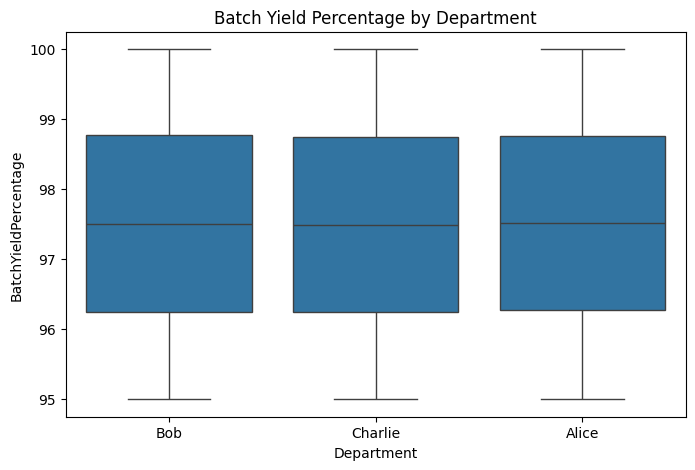

In [103]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Department', y='BatchYieldPercentage', data=df_anova)
plt.title('Batch Yield Percentage by Department')
plt.show()
